# Imports

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px # => Biblioteca mapa
 
from matplotlib import pyplot as plt # => Biblioteca Gráficos
 

# Launch Aplication

In [2]:
df = pd.read_csv('../datasets/kc_house_data.csv')
df.drop(['sqft_living15', 'sqft_lot15'], axis= 1).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


# Questions | Answers - Lesson Three

### 1. Crie uma nova coluna chamada : "dormitory_type"
    1.1 - Se o valor da coluna "bedrooms" for igual à 1 => "studio"
    1.2 - Se o valor da coluna 'bedrooms' for igual a 2 => 'apartament'
    1.3 - Se o valor da coluna 'bedrooms' for maior que 2 => 'house'

In [3]:
df ['dormitory_type'] = 'vazio' 

df.loc[df['bedrooms'] < 1, 'dormitory_type'] = 'kitnet' 
df.loc[df['bedrooms'] > 2, 'dormitory_type'] = 'house'

df.loc[df['bedrooms'] == 1, 'dormitory_type'] = 'studio'
df.loc[df['bedrooms'] == 2, 'dormitory_type'] = 'apartament'

df.loc[0:30, ['bedrooms', 'dormitory_type']]



,bedrooms,dormitory_type
0,3,house
1,3,house
2,2,apartament
3,4,house
4,3,house
5,4,house
6,3,house
7,3,house
8,3,house
9,3,house


### 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

Text(0.5, 0, 'Bedrooms')

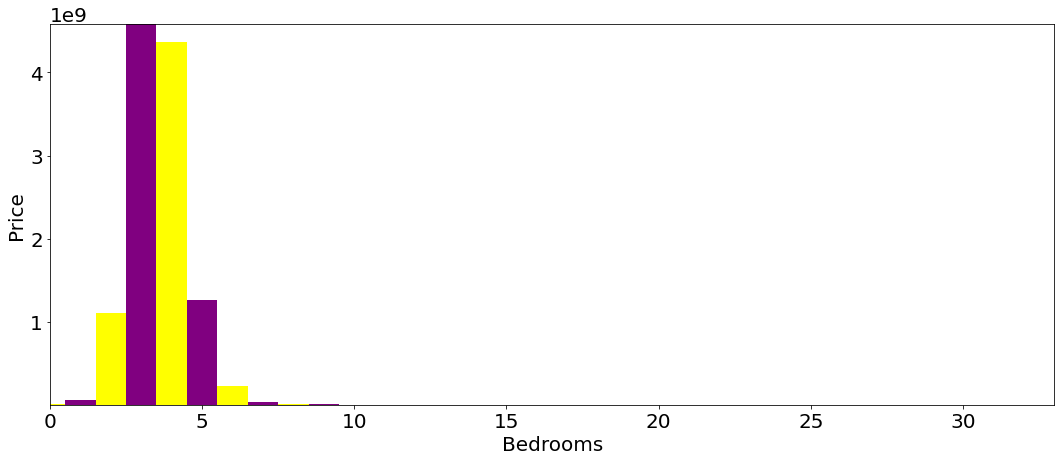

In [4]:
# soma dos preços
pd.set_option('display.float_format', lambda x: '%.2f' % x) # função aletara casas decimais

group_price = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

# estrutura do gráfico
plt.rcParams.update({'font.size': 20})

plt.figure(figsize= (18, 7))
plt.bar (group_price['bedrooms'], 
         group_price['price'],
         width= 1,
         color= ['yellow', 'purple']
         )

plt.xlim(group_price['bedrooms'].min(), 
         group_price['bedrooms'].max())

plt.ylim(group_price['price'].min(), 
         group_price['price'].max())

plt.ylabel('Price')
plt.xlabel('Bedrooms')


### 3. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.

(array([1900., 1920., 1940., 1960., 1980., 2000., 2020.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

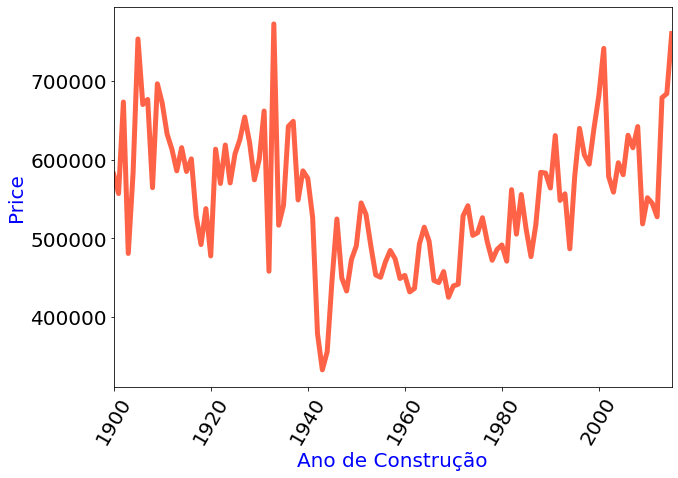

In [5]:
# média por ano
graph_line = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()


# gráfico
plt.figure(figsize= (10, 7))

plt.plot(graph_line['yr_built'], graph_line['price'], linewidth= 5, color= '#FF6347')

plt.xlim(graph_line['yr_built'].min(), 2015)

plt.xlabel('Ano de Construção', color= 'blue')
plt.ylabel('Price', color= 'blue')
plt.xticks(rotation= 60)



### 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

<BarContainer object of 4 artists>

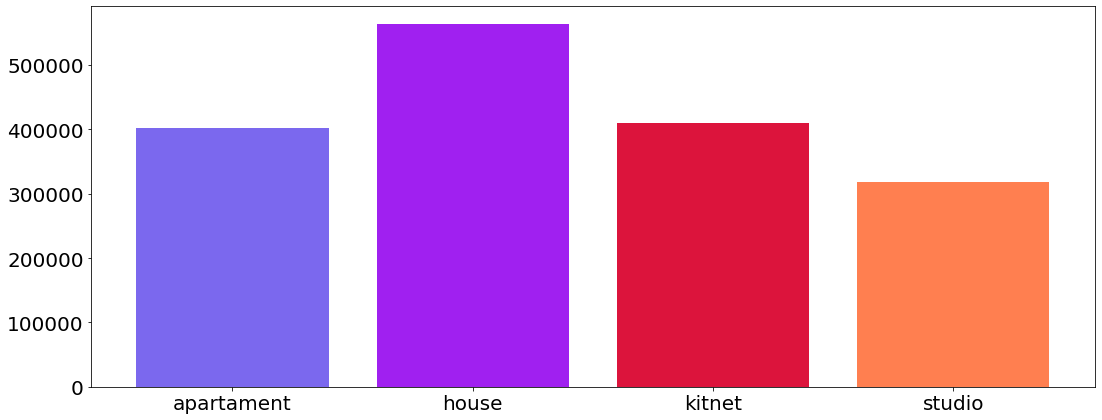

In [6]:
# preço pelo tipo de construção
group_type = df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

# gráfico de barras
plt.figure(figsize= (18, 7))

plt.bar(group_type['dormitory_type'], group_type['price'], color= ['#7B68EE', '#A020F0', '#DC143C', '#FF7F50'])



### 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

(1930.0, 2015.0)

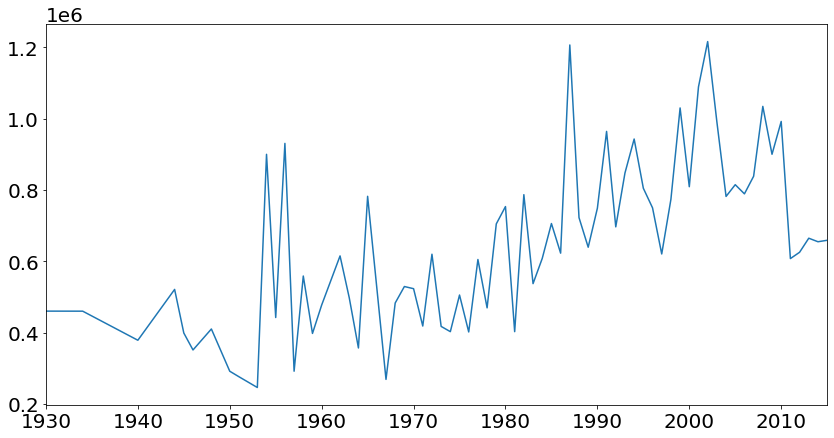

In [7]:
reform = df[['yr_renovated', 'price']].groupby('yr_renovated').mean().reset_index()

plt.figure (figsize = (14, 7))
plt.plot(reform['yr_renovated'], reform['price'])

plt.xlim(1930, reform['yr_renovated'].max())


### 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.


In [46]:
pd.set_option('display.float_format', lambda x: '%.0f' %x)

media = df[['price', 'dormitory_type', 'yr_built']].groupby(by=['yr_built','dormitory_type']).mean().reset_index()

media

,yr_built,dormitory_type,price
0,1900,apartament,589533
1,1900,house,584854
2,1900,studio,398944
3,1901,apartament,452856
4,1901,house,578619
...,...,...,...
309,2014,house,692688
310,2014,studio,516500
311,2015,apartament,543250
312,2015,house,797383


### 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )

<BarContainer object of 4 artists>

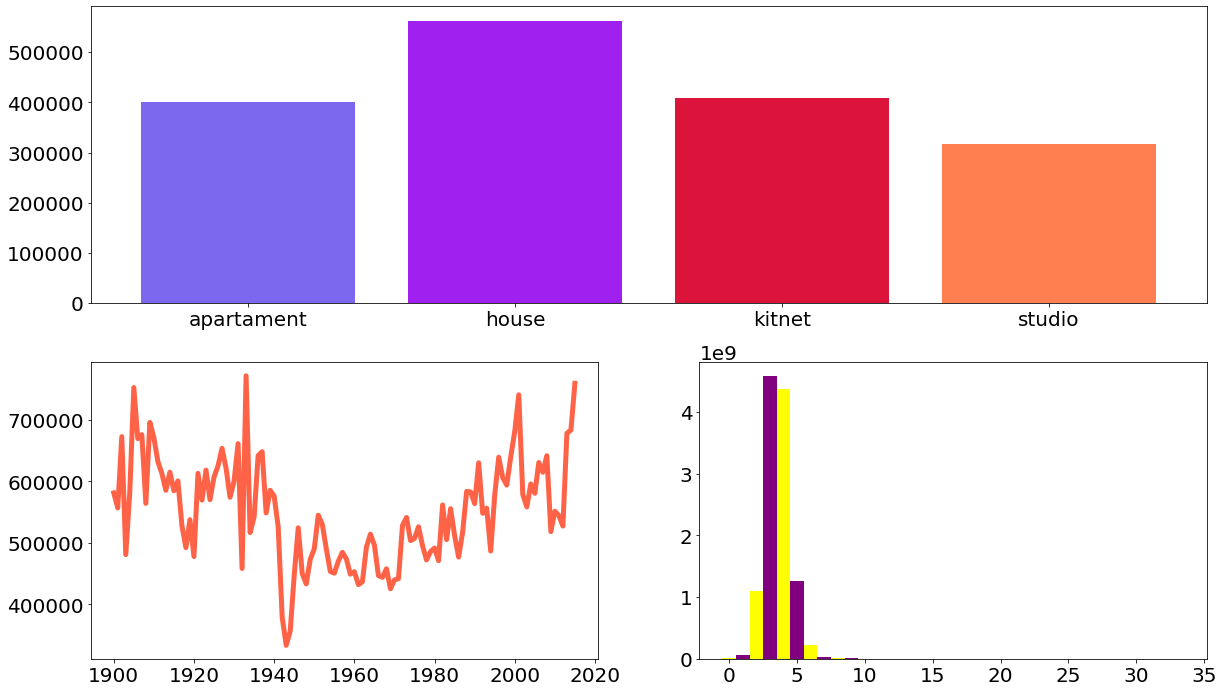

In [61]:
# Sub Mission
    # 1.1 Usar a função subplot
from matplotlib import gridspec

plt.rcParams.update({'font.size': 20})  # Aumenta o tamanho da fonte

fig = plt.figure (figsize = (20, 12)) # aumente o tamanho das figura para 20 x 7

specs = gridspec.GridSpec(ncols= 2, nrows= 2, figure= fig) # crie uma grid com 2 colunas e 2 linhas

ax1 = fig.add_subplot (specs[0, :]) # adiciona uma figura na primeira linha em todas as colunas 
ax2 = fig.add_subplot (specs[1, 0]) # adiciona uma figura na segunda linha, na primeira coluna
ax3 = fig.add_subplot (specs[1, 1]) # adiciona uma figura na segunda linha. na segunda coluna
    
# GRAPH ONE
# soma dos preços
pd.set_option('display.float_format', lambda x: '%.2f' % x) # função aletara casas decimais
group_price = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

# estrutura do gráfico 1
ax3.bar (group_price['bedrooms'], group_price['price'], width= 1, color= ['yellow', 'purple'])

# GRAPH TWO
# média por ano
group_line = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

# estrutura do gráfico 2
ax2.plot(group_line['yr_built'], group_line['price'], linewidth= 5, color= '#FF6347')

# GRAPH THREE
# preço pelo tipo de construção
group_type = df[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

# estrutura do gráfico 3
ax1.bar(group_type['dormitory_type'], group_type['price'], color= ['#7B68EE', '#A020F0', '#DC143C', '#FF7F50'])



### 8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

### 9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 linhas )

### 10. Crie um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar.